1) Vytvořte pole 3x4 typu bool se všemi prvky True.
2) Vytvořte matici 5x5 kde jediné nenulová prvky jsou [1, 2, 3, 4] pod hlavní diagonálou (nápověda - podívejte se na nápovědu funkce diagflat).

In [29]:
import numpy as np

A = np.ones(shape=(3,4), dtype=bool)
print(A)

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]


In [52]:
B = np.diagflat([1, 2, 3, 4], -1)
print(B)

[[0 0 0 0 0]
 [1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]]


Z pole 8x8 samých nul vyvořte pomocí řezů co nejelegantnějším způsobem 8x8 matici, která vypadá jako šachovnice.

In [77]:
C = np.zeros((8,8))
for i in range(len(C)):
    if(i%2 == 0):C[i][0:8:2]= 1
    if(i%2 == 1):C[i][1:9:2]= 1
print(C)


[[1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]]


4) Pomocí np.random.randint vytvořte vektor dvouciferných kladných celých čísel. Poté pomocí indexu typu masky nahraďte liché hodnoty jejich opačnou hodnotou. Např. [11, 20, 42, 33] -> [-11, 20, 42, -33].

In [89]:
D = np.random.randint(10,99,(5))
print(D)
for i in range(len(D)):
    if(D[i]%2 == 1): D[i] *= -1
print(D)

[53 31 39 23 68]
[-53 -31 -39 -23  68]


5)

In [93]:
A = np.random.rand(3,3)
B = np.random.rand(3,3)
C = np.transpose(A*B)
D = np.transpose(A)* np.transpose(B)
print(C)
print("-----------------------------")
print(D)
print("-----------------------------")
print(C-D)

[[0.02682811 0.14633227 0.09524339]
 [0.0242823  0.08002354 0.63079964]
 [0.45251012 0.26280428 0.30670666]]
-----------------------------
[[0.02682811 0.14633227 0.09524339]
 [0.0242823  0.08002354 0.63079964]
 [0.45251012 0.26280428 0.30670666]]
-----------------------------
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


Pro náhodné 1D vektory vypočítejte dyadický součin n*v 

In [1]:
import numpy as np

n = np.random.random(8)
v = np.random.random(8)
out = np.zeros([8,8])
for i in range(len(n)):
    for j in range(len(v)):
        out[i][j] = n[i] * v[j]

print((out - (np.outer(n,v)))) # vypočtený dekadický součin - np.outer(n,v) by se měl = 0


[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


7) Vytvořte šachovnicovou matici pomocí tile.

In [40]:
n = 4 #velikost šachovnice, 4 == šachovnice
a = np.array([[1, 0], [0, 1]])
print(np.tile(a, (n, n)))

[[1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]]


Domácí Úkol

In [4]:
import numpy as np
import matplotlib as plt

def integer_spiral(n):
    A = np.zeros([n+2,n+2])
    pos_rows = n//2 +1
    pos_cols = n//2 +1
    i = 1

    A[pos_rows, pos_cols] = i
    i += 1
    pos_rows -= 1

    while(i <= n**2):
        A[pos_rows, pos_cols] = i
        i+=1
        if(A[pos_rows - 1, pos_cols] != 0 and A[pos_rows, pos_cols + 1] == 0):
            pos_cols += 1
        elif(A[pos_rows, pos_cols - 1] != 0):
            pos_rows -= 1
        elif(A[pos_rows + 1, pos_cols] != 0):
            pos_cols -= 1
        else:
            pos_rows += 1

    return A[1:-1, 1:-1]

def integer_spiral_numpy(n):

    B = np.zeros([n+2,n+2], dtype = int)
    b = np.arange(1,(n**2)+1)
    i,j = n//2 +1, n//2 +1
    current = 1

    for k in range(int((n+1)/2)-1): #int((n+1)/2)
        
        hrana_Up = slice(current, current+2*k+1)
        B[i+k-1:i-k-2:-1, j+k] = b[hrana_Up]
        current += 2*k+1
        
        hrana_Left = slice(current, current+2*k+1)
        B[i-k-1, j+k-1:j-k-2:-1] = b[hrana_Left]
        current += 2*k+1
        
        
        hrana_Down = slice(current, current+2*k+2)
        B[i-k:i+k+2, j-k-1] = b[hrana_Down]
        current += 2*k+2
        
        
        hrana_Right = slice(current, current+2*k+2)
        B[i+k+1, j-k:j+k+2 ] = b[hrana_Right]
        current += 2*k+2

    k =int((n+1)/2)-1
    hrana_Up = slice(current, current+2*k+1)
    B[i+k-1:i-k-1:-1, j+k] = b[hrana_Up]
    B[i, j] = 1    
    return B[1:-1, 1:-1]

A = integer_spiral(7)
print(A)
print("-----------------------------")
B = integer_spiral_numpy(7)
print(B)
print("-----------------------------""\n""SPIRAL")

%time integer_spiral(10001)
print("--------" "\n" "NUMPY_SPIRAL" )
%time integer_spiral_numpy(10001)
print("--------")

[[31. 30. 29. 28. 27. 26. 49.]
 [32. 13. 12. 11. 10. 25. 48.]
 [33. 14.  3.  2.  9. 24. 47.]
 [34. 15.  4.  1.  8. 23. 46.]
 [35. 16.  5.  6.  7. 22. 45.]
 [36. 17. 18. 19. 20. 21. 44.]
 [37. 38. 39. 40. 41. 42. 43.]]
-----------------------------
[[31 30 29 28 27 26 49]
 [32 13 12 11 10 25 48]
 [33 14  3  2  9 24 47]
 [34 15  4  1  8 23 46]
 [35 16  5  6  7 22 45]
 [36 17 18 19 20 21 44]
 [37 38 39 40 41 42 43]]
-----------------------------
SPIRAL
CPU times: total: 1min 8s
Wall time: 1min 8s
--------
NUMPY_SPIRAL
CPU times: total: 547 ms
Wall time: 539 ms
--------


Mandelbrod


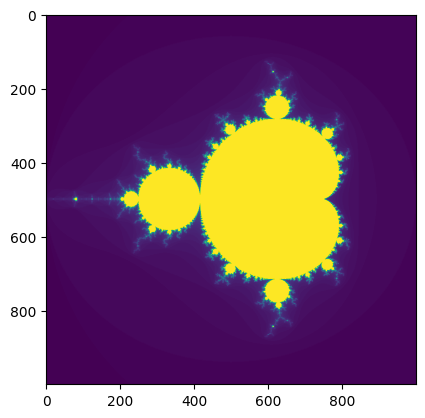

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot_set(x_min = -2, x_max = 1, y_min = -1.5, y_max = 1.5, n = 1000, k= 100):
    
    y, x = np.mgrid[x_min:x_max:complex(0, n), y_min:y_max:complex(0, n)]#.astype(np.float128)
    c = (x-0.5)+(y+0.5)* 1j
    divergence_matrix = np.zeros((np.shape(c)))+k
    zn = 0
    for i in range(k):
        zn = (zn**2) + c
        for m in range(n):
            for l in range(n):
                if(np.abs(zn[m,l]) > 2):

                    divergence_matrix[m,l] -= 1
                    zn[m,l] = 2
         
    return divergence_matrix

n = 1000
k = 100

divergence_matrix = mandelbrot_set(n=n, k=k)
plt.imshow(divergence_matrix) #, cmap='terrain'
plt.show()

BONUS

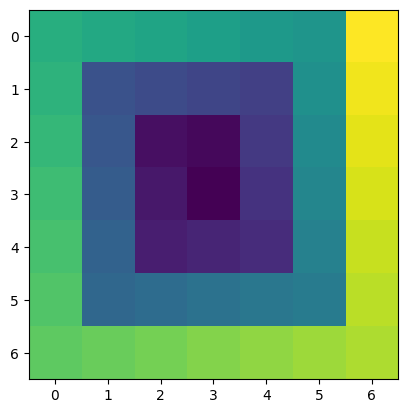

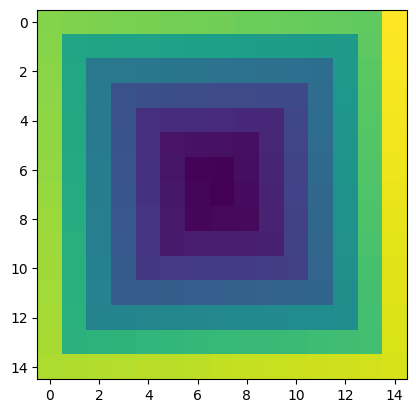

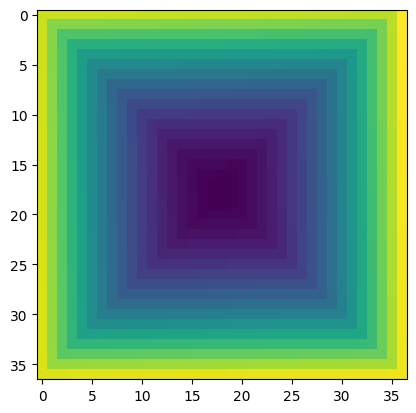

In [35]:
import matplotlib.pyplot as plt

B = integer_spiral_numpy(7) #? obr_00
plt.imshow(B) # Tohle se vykreslí +- stejně -> np.sin(A*0.03)
C = integer_spiral_numpy(15)#? obr_01
plt.figure()
plt.imshow(C)
D = integer_spiral_numpy(37)#? obr_02
plt.figure()
plt.imshow(D)
plt.show()

Prvocisla

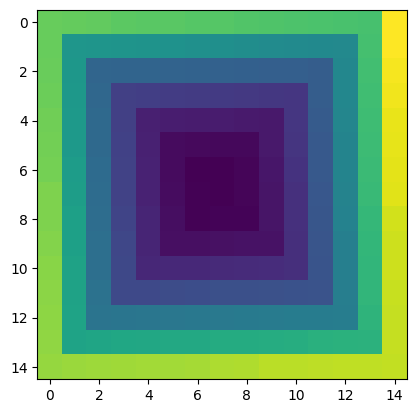

In [44]:
import numpy as np
import matplotlib.pyplot as plt

def prvocisla(n):
    N,j = 2,0
    list_prv = list(range(n+1))
    
    while 1:
        prvocislo_otaznik = True
        for i in range(2, N):
            if(N % i == 0):
                prvocislo_otaznik = False
                break
        
        if prvocislo_otaznik:
            list_prv[j] = N
            j += 1
            
        N += 1
        if(list_prv[n] != n): return list_prv

def integer_spiral(n):
    A = np.zeros(n+2,n+2)
    pos_rows = n//2 +1
    pos_cols = n//2 +1
    i = 1

    A[pos_rows, pos_cols] = i
    i += 1
    pos_rows -= 1

    while(i <= n**2):
        A[pos_rows, pos_cols] = i
        i+=1
        if(A[pos_rows - 1, pos_cols] != 0 and A[pos_rows, pos_cols + 1] == 0):
            pos_cols += 1
        elif(A[pos_rows, pos_cols - 1] != 0):
            pos_rows -= 1
        elif(A[pos_rows + 1, pos_cols] != 0):
            pos_cols -= 1
        else:
            pos_rows += 1

    return A[1:-1, 1:-1]

def integer_spiral_numpy(n):

    B = np.zeros([n+2,n+2], dtype = int)
    b = prvocisla((n**2)+1)
    i,j = n//2 +1, n//2 +1
    current = 1

    for k in range(int((n+1)/2)-1): #int((n+1)/2)
        hrana_Up = slice(current, current+2*k+1)
        B[i+k-1:i-k-2:-1, j+k] = b[hrana_Up]
        current += 2*k+1
        
        hrana_Left = slice(current, current+2*k+1)
        B[i-k-1, j+k-1:j-k-2:-1] = b[hrana_Left]
        current += 2*k+1
        
        hrana_Down = slice(current, current+2*k+2)
        B[i-k:i+k+2, j-k-1] = b[hrana_Down]
        current += 2*k+2
        
        hrana_Right = slice(current, current+2*k+2)
        B[i+k+1, j-k:j+k+2 ] = b[hrana_Right]
        current += 2*k+2
        
    k =int((n+1)/2)-1
    hrana_Up = slice(current, current+2*k)
    B[i+k-1:i-k-1:-1, j+k] = b[hrana_Up]
    B[i, j] = 1    
    return B[1:-1, 1:-1]

E = integer_spiral_numpy(15) #prvocisla
plt.imshow(E)
plt.show()


Julia set


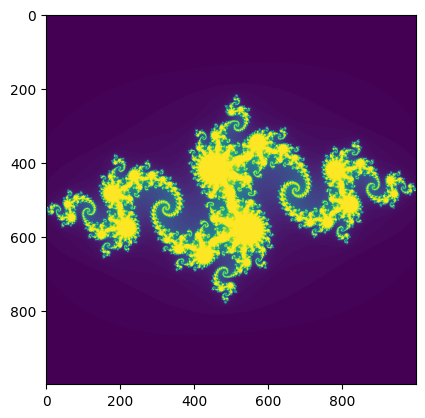

In [63]:
import numpy as np
import matplotlib.pyplot as plt

def julia_set(c, x_min=-1.5, x_max=1.5, y_min=-1.5, y_max=1.5, n=1000, k=100):
    y, x = np.mgrid[x_min:x_max:complex(0, n), y_min:y_max:complex(0, n)]
    zn = x + y * 1j
    divergence_matrix = np.zeros((np.shape(zn))) + k

    for i in range(k):
        zn = zn**2 + c
        divergent = np.abs(zn) > 2
        divergent_now = divergent & (divergence_matrix == k)
        divergence_matrix[divergent_now] = i + 1
        zn[divergent] = 2
    
    return divergence_matrix

c = -0.8 + 0.156 * 1j
T = julia_set(c) #julia set
plt.imshow(T)
plt.show()

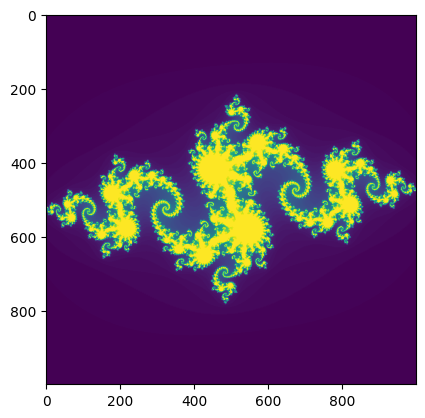

In [77]:
import numpy as np
import matplotlib.pyplot as plt

def julia(c,x_min = -1.5, x_max = 1.5, y_min = -1.5, y_max = 1.5, n = 1000, k= 100):
    
    y, x = np.mgrid[x_min:x_max:complex(0, n), y_min:y_max:complex(0, n)]#.astype(np.float128)
    #c = (x-0.5)+(y+0.5)* 1j
    divergence_matrix = np.zeros((n,n))
    zn = x + y * 1j
    for i in range(k):
        zn = (zn**2) + c
        for m in range(n):
            for l in range(n):
                if(np.abs(zn[m,l]) > 2):

                    divergence_matrix[m,l] -= 1
                    zn[m,l] = 2
         
    return divergence_matrix

c = -0.8 + 0.156 * 1j
jul = julia(c)
plt.imshow(jul) #, cmap='terrain'
plt.show()